# Support Vector Machine


**Исполнители (ФИО):** Буканов Иван

---

Здравствуйте! На этом семинаре вы познакомитесь с ещё одним алгоритмом машинного обучения - Методом Опорных Векторов, который применяется для решения задач классификации и регрессии

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

Начнём с задачи классификации. Классический Метод Опорных Векторов (SVM) относится к классу линейных моделей, т.е. как и в случае с Логистической Регрессией и Линейным Дискриминантным Анализом мы пытаемся построить прямую для разделения двух классов. Однако в SVM при построении разделяющей прямой $w\cdot x + b = 0$ мы рассматриваем её вместе с зазором (margin): прямыми $w\cdot x + b = 1$ и $w\cdot x + b = -1$. Вектора, находящиеся на границе зазора мы называем *опорными векторами*, потому что фактически они и создают *опору* для зазора

Если классы линейно разделимы, то мы работаем с "жёстким" зазором, т.е. просто пытаемся максимизировать расстояние между классами. Однако чаще мы имеем дело с линейно неразделимыми классами, в таком случае мы работаем с "мягким" зазором: допускаем, чтобы некоторые точки попадали внутрь зазора. В этом случае мы строим такую разделяющую прямую, которая бы максимизировала зазор, минимизируя количество точек попавших в него

## Задача 1

Сгенерировать два двумерных нормальных распределения $X_{1}\sim\mathcal{N}(\mu_{1},\Sigma_{1})$, $X_{2}\sim\mathcal{N}(\mu_{2},\Sigma_{2})$ объема 100, где $\mu_{1}=(0,0), \Sigma_{1}=\begin{pmatrix}0.2 & 0\\ 0 & 0.2\end{pmatrix}$, $\mu_{2}=(1,1), \Sigma_{2}=\begin{pmatrix}0.2 & 0\\ 0 & 0.2\end{pmatrix}$

In [83]:
rng = np.random.default_rng(seed=None) 
n = 100
mu1 = np.array([0, 0])
Sigma1 = np.array([[0.2, 0], [0, 0.2]])
mu2 = np.array([1, 1])
Sigma2 = np.array([[0.2, 0], [0, 0.2]])
X1 = rng.multivariate_normal(mu1, Sigma1, n)
X2 = rng.multivariate_normal(mu2, Sigma2, n)



Классифицируйте данные методом опорных векторов [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [84]:
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(100), np.ones(100)))
clf = LinearSVC(random_state=None)
clf.fit(X, y)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


Визуализируйте данные, раскрасьте классы, используя истинные метки, изобразите на них разделяющую прямую и зазор

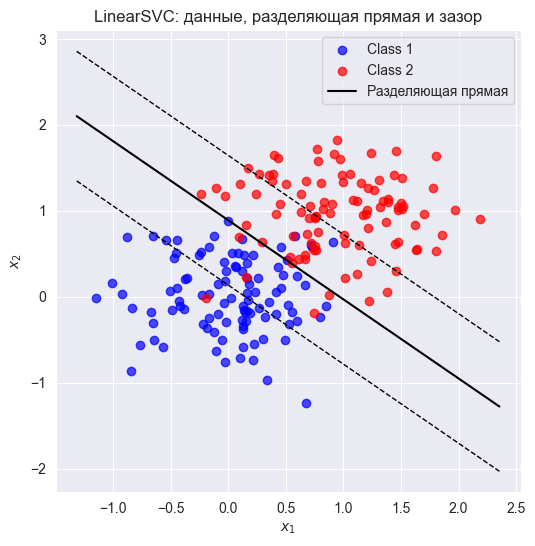

In [85]:

w = clf.coef_[0]
b = clf.intercept_[0]

plt.figure(figsize=(6,6))

# точки
plt.scatter(X1[:,0], X1[:,1], color='blue', label='Class 1', alpha=0.7)
plt.scatter(X2[:,0], X2[:,1], color='red', label='Class 2', alpha=0.7)

# создаём диапазон по x
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, 200)

# разделяющая прямая: w1*x + w2*y + b = 0 → y = -(w1*x + b)/w2
yy = -(w[0]*xx + b)/w[1]

# границы зазора (margin): ±1
yy_down = -(w[0]*xx + b - 1)/w[1]
yy_up   = -(w[0]*xx + b + 1)/w[1]

plt.plot(xx, yy, 'k-', label='Разделяющая прямая')
plt.plot(xx, yy_down, 'k--', linewidth=1)
plt.plot(xx, yy_up, 'k--', linewidth=1)

plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('LinearSVC: данные, разделяющая прямая и зазор')
plt.grid(True)
plt.show()

Оцените качество классификации алгоритма и сравните его с [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) и [Логистической регрессией](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

LinearSVC  | train acc = 0.936 | test acc = 0.950
LDA        | train acc = 0.929 | test acc = 0.933
Logistic   | train acc = 0.936 | test acc = 0.950


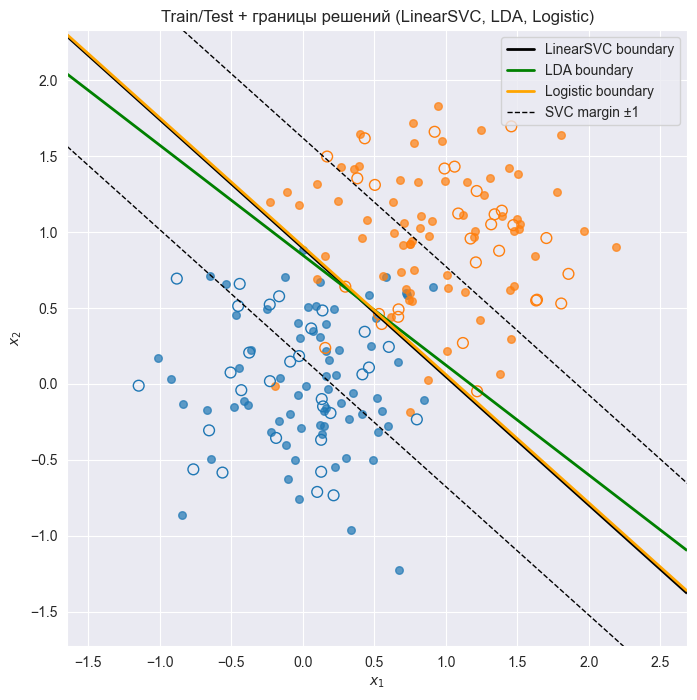

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=None
)


models = {
    "LinearSVC": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(random_state=None, max_iter=10000))
    ]),
    "LDA": LinearDiscriminantAnalysis(),  # без скейлинга: предпосылка ковариаций
    "Logistic": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(random_state=None, max_iter=10000))
    ]),
}

# обучение и отчёт
for name, est in models.items():
    est.fit(X_train, y_train)
    tr = est.score(X_train, y_train)
    te = est.score(X_test, y_test)
    print(f"{name:10s} | train acc = {tr:.3f} | test acc = {te:.3f}")

# визуализация: train — точка, test — пустой маркер; границы решений из decision_function
plt.figure(figsize=(8, 8))
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], s=30, alpha=0.7, label='Train, class 0')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], s=30, alpha=0.7, label='Train, class 1')
plt.scatter(X_test[y_test==0,0],  X_test[y_test==0,1],  s=60, facecolors='none', edgecolors='C0', label='Test, class 0')
plt.scatter(X_test[y_test==1,0],  X_test[y_test==1,1],  s=60, facecolors='none', edgecolors='C1', label='Test, class 1')

# сетка для контуров
pad = 0.5
x1_min, x1_max = X[:,0].min()-pad, X[:,0].max()+pad
x2_min, x2_max = X[:,1].min()-pad, X[:,1].max()+pad
xx1 = np.linspace(x1_min, x1_max, 400)
xx2 = np.linspace(x2_min, x2_max, 400)
XX1, XX2 = np.meshgrid(xx1, xx2)
grid = np.c_[XX1.ravel(), XX2.ravel()]

colors = {"LinearSVC": "k", "LDA": "green", "Logistic": "orange"}

def decision_values(est, G):
    if hasattr(est, "decision_function"):
        z = est.decision_function(G)
        if z.ndim > 1:
            z = z[:, 0]
        return z
    elif hasattr(est, "predict_proba"):
        return est.predict_proba(G)[:, 1] - 0.5
    else:
        return est.predict(G) - 0.5

handles = []
for name, est in models.items():
    Z = decision_values(est, grid).reshape(XX1.shape)
    plt.contour(XX1, XX2, Z, levels=[0.0], colors=colors[name], linewidths=2)
    handles.append(plt.Line2D([0], [0], color=colors[name], lw=2, label=f"{name} boundary"))

# зазор только для LinearSVC (±1)
svc = models["LinearSVC"]
Zsvc = decision_values(svc, grid).reshape(XX1.shape)
plt.contour(XX1, XX2, Zsvc, levels=[-1.0, 1.0], colors='k', linestyles='--', linewidths=1)
handles.append(plt.Line2D([0], [0], color='k', lw=1, linestyle='--', label='SVC margin ±1'))

plt.legend(handles=handles, loc='best')
plt.xlabel("$x_1$"); plt.ylabel("$x_2$")
plt.title("Train/Test + границы решений (LinearSVC, LDA, Logistic)")
plt.grid(True); plt.show()

В случае линейно неразделимых классов, когда мы работаем с "мягким" зазором, нам бы хотелось, чтобы как можно меньше точек попадалов в него, потому мы вводим регуляризацию, т.е. начинаем штрафовать точки за попадание в зазор. Как и с линейной регрессией у нас есть два вида штафа: L1 и L2

Посмотрите как влияет регуляризация (L1, L2) на работу метода, попробуйте разное значение штрава (параметр С), изобразите результаты и посчитайте качество классификации

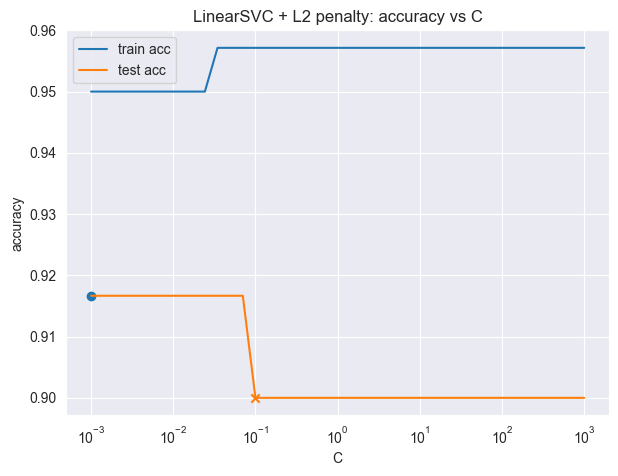

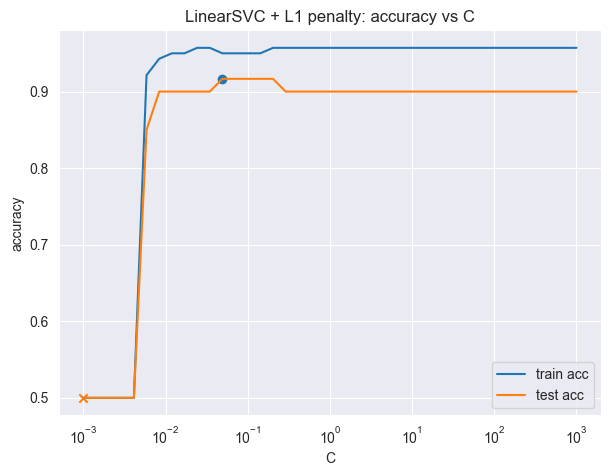

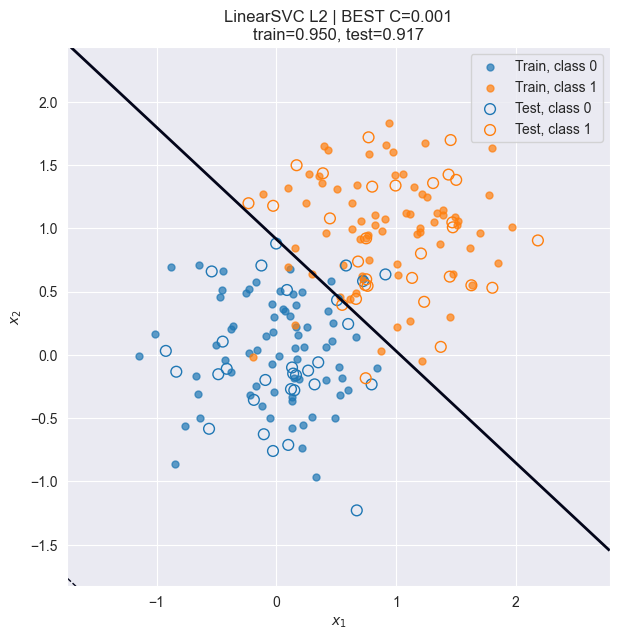

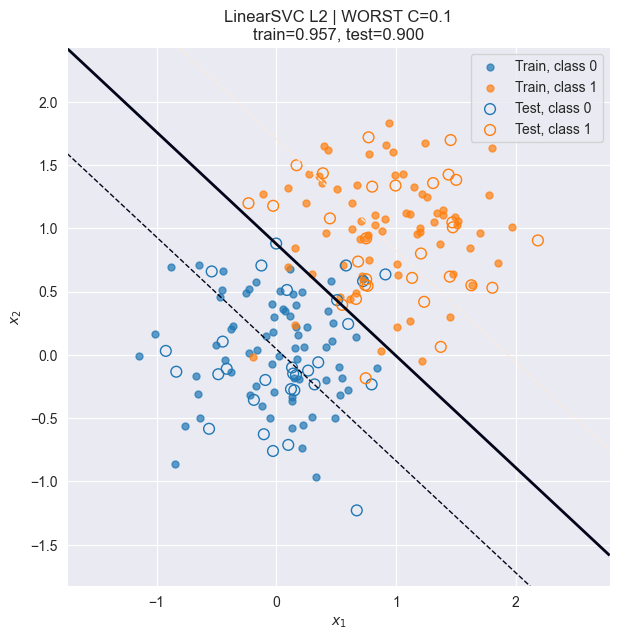

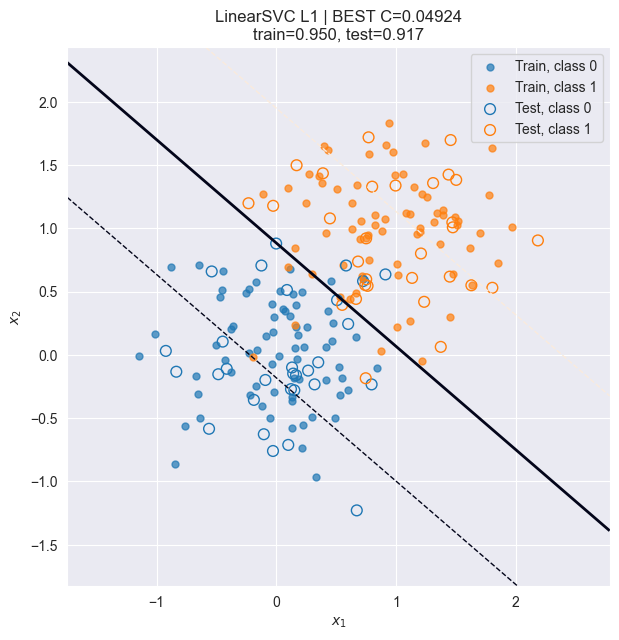

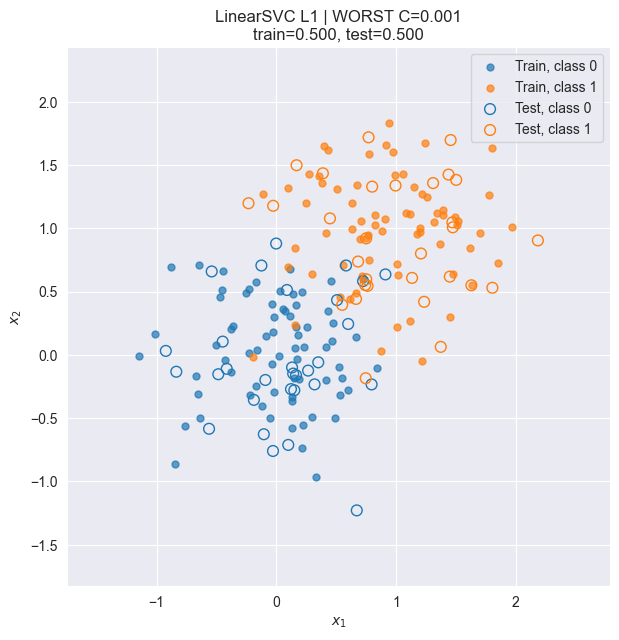

L2 | best:  C=0.001, test=0.917 | worst: C=0.1, test=0.900
L1 | best:  C=0.04924, test=0.917 | worst: C=0.001, test=0.500


In [87]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=None
)

C_grid = np.logspace(-3, 3, 40)  # 40 значений от 1e-3 до 1e+3

def fit_curve(penalty):
    # Для L1 нужно dual=False, для L2 допустим dual=True (быстрее)
    dual = False if penalty == 'l1' else True
    tr_acc, te_acc = [], []
    for C in C_grid:
        est = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LinearSVC(penalty=penalty, loss='squared_hinge',
                              C=C, dual=dual, random_state=0, max_iter=100000))
        ])
        est.fit(X_train, y_train)
        tr_acc.append(est.score(X_train, y_train))
        te_acc.append(est.score(X_test, y_test))
    tr_acc = np.array(tr_acc); te_acc = np.array(te_acc)
    best_idx = int(np.argmax(te_acc))
    worst_idx = int(np.argmin(te_acc))
    return tr_acc, te_acc, best_idx, worst_idx

results = {}
for pen in ['l2', 'l1']:
    results[pen] = fit_curve(pen)

# графики accuracy vs C (лог-шкала)
for pen in ['l2', 'l1']:
    tr_acc, te_acc, best_idx, worst_idx = results[pen]
    plt.figure(figsize=(7,5))
    plt.plot(C_grid, tr_acc, label='train acc')
    plt.plot(C_grid, te_acc, label='test acc')
    plt.scatter([C_grid[best_idx]], [te_acc[best_idx]], marker='o')
    plt.scatter([C_grid[worst_idx]], [te_acc[worst_idx]], marker='x')
    plt.xscale('log')
    plt.xlabel('C'); plt.ylabel('accuracy')
    plt.title(f'LinearSVC + {pen.upper()} penalty: accuracy vs C')
    plt.legend(); plt.grid(True)
    plt.show()

# контуры границ для лучших/худших C у каждого штрафа
def decision_values(est, G):
    z = est.decision_function(G)
    if z.ndim > 1: z = z[:,0]
    return z

def plot_boundary_for(penalty, C, title):
    dual = False if penalty == 'l1' else True
    est = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(penalty=penalty, loss='squared_hinge',
                          C=C, dual=dual, random_state=None, max_iter=100000))
    ])
    est.fit(X_train, y_train)

    pad = 0.6
    x1_min, x1_max = X[:,0].min()-pad, X[:,0].max()+pad
    x2_min, x2_max = X[:,1].min()-pad, X[:,1].max()+pad
    xx1 = np.linspace(x1_min, x1_max, 500)
    xx2 = np.linspace(x2_min, x2_max, 500)
    XX1, XX2 = np.meshgrid(xx1, xx2)
    grid = np.c_[XX1.ravel(), XX2.ravel()]
    Z = decision_values(est, grid).reshape(XX1.shape)

    plt.figure(figsize=(7,7))
    # train (filled), test (empty)
    plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], s=25, alpha=0.7, label='Train, class 0')
    plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], s=25, alpha=0.7, label='Train, class 1')
    plt.scatter(X_test[y_test==0,0],  X_test[y_test==0,1],  s=60, facecolors='none', edgecolors='C0', label='Test, class 0')
    plt.scatter(X_test[y_test==1,0],  X_test[y_test==1,1],  s=60, facecolors='none', edgecolors='C1', label='Test, class 1')

    # граница и зазор
    plt.contour(XX1, XX2, Z, levels=[0.0], linewidths=2)
    plt.contour(XX1, XX2, Z, levels=[-1.0, 1.0], linestyles='--', linewidths=1)

    tr = est.score(X_train, y_train)
    te = est.score(X_test, y_test)
    plt.title(f'{title}\ntrain={tr:.3f}, test={te:.3f}')
    plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
    plt.xlim(x1_min, x1_max); plt.ylim(x2_min, x2_max)
    plt.legend(loc='best'); plt.grid(True); plt.show()

# строим 4 картинки: лучший/худший для L2 и L1
for pen in ['l2', 'l1']:
    tr_acc, te_acc, best_idx, worst_idx = results[pen]
    C_best  = C_grid[best_idx]
    C_worst = C_grid[worst_idx]
    plot_boundary_for(pen, C_best,  f'LinearSVC {pen.upper()} | BEST C={C_best:.4g}')
    plot_boundary_for(pen, C_worst, f'LinearSVC {pen.upper()} | WORST C={C_worst:.4g}')

# печать итогов
for pen in ['l2', 'l1']:
    tr_acc, te_acc, best_idx, worst_idx = results[pen]
    print(f"{pen.upper()} | best:  C={C_grid[best_idx]:.4g}, test={te_acc[best_idx]:.3f} | "
          f"worst: C={C_grid[worst_idx]:.4g}, test={te_acc[worst_idx]:.3f}")

**Вопрос:** Как изменилось качество классификации, объясните результат?

Никак, она и так слишком хорошая, это можно только испортить


Теперь попробуйте применить метод опорных векторов для многоклассовой классификации, для этого сгенерируйте несколько нормальных куч с разной дисперсией (минимум 3) и примените к ним метод. Результаты визуализируйте

**Вопрос:** Какие классы классифицировались хорошо/плохо? Предположите почему?

Your answer here

## Задача 2

Как вы уже знаете, если данные линейно неразделимы, можно попробовать применить ядро для перехода в пространство, где они уже будут линейно разделимы. Метод опорных векторов также имеет ядерную модификацию, которая реализована в [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#)

Сгенерируйте два непересекающихся кольца с общим центром

In [ ]:
#Your code here

Попробуйте классифицировать данные методом [KernelSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#), попробуйте различные ядра, вместо линейного ядра используйте [LinearSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [ ]:
#Your code here

Добавьте к сравнению [Логистическую регрессию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), посчитайте качество классификации и визуализируйте результаты

In [ ]:
#Your code here

Измените дисперсию классов, чтобы добиться их пересечения. Посмотрите как влияет разная степень пересечения классов и их дисбаланс на работу Ядерного Метода опорных векторов 

In [ ]:
#Your code here

**Вопрос:** Какой получается результат для разных ядер? 

Your answer here

## Задача 3

Проведите сравнение Метода опорных векторов, [Логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) и [QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html) на датасете titanic.csv: оцените качество классификации, постройте ROC-кривые, визуализируйте результаты (если возможно). Выберите лучший классификатор, свой ответ обоснуйте

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score,
    accuracy_score, f1_score, precision_score, recall_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

## Data extraction & preparing

In [89]:
# Загрузка датасета (лежит в директории с ноутбуком)
df = pd.read_csv("titanic.csv")

# Целевая переменная и фичи
y = df["Survived"].astype(int)
X = df.drop(columns=["Survived", "PassengerId", "Name", "Ticket", "Cabin"])

# Выделяем признаки
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
categorical_features = ["Sex", "Embarked", "Pclass"] 

# Трансформеры
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

# Общий препроцессор
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Трейн/тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((668, 7), (223, 7), (668,), (223,))

In [90]:
results = []

def evaluate_model(name, estimator):
    """
    Обучение pipeline(preprocess + estimator), печать метрик,
    отрисовка матрицы ошибок и ROC, возврат словаря с результатами.
    """
    pipe = Pipeline(steps=[("prep", preprocess), ("clf", estimator)])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    # Оценка вероятностей для ROC
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_score = pipe.predict_proba(X_test)[:, 1]
    else:
        s = pipe.decision_function(X_test)
        s_min, s_max = s.min(), s.max()
        y_score = (s - s_min) / (s_max - s_min + 1e-12)  # нормализация для стабильного графика ROC

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_score)

    print(f"{name}: accuracy={acc:.4f}, precision={prec:.4f}, recall={rec:.4f}, f1={f1:.4f}, ROC-AUC={auc:.4f}\n")
    print("Классификационный отчёт:\n", classification_report(y_test, y_pred, digits=4))

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', aspect='auto')
    plt.title(f"{name}: confusion matrix")
    plt.xlabel("Predicted"); plt.ylabel("True")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.colorbar()
    plt.show()

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f"{name}: ROC curve")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    res = {
        "model": name,
        "accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc,
        "fpr": fpr, "tpr": tpr
    }
    results.append(res)
    return res


LogisticRegression: accuracy=0.7758, precision=0.7250, recall=0.6744, f1=0.6988, ROC-AUC=0.8421

Классификационный отчёт:
               precision    recall  f1-score   support

           0     0.8042    0.8394    0.8214       137
           1     0.7250    0.6744    0.6988        86

    accuracy                         0.7758       223
   macro avg     0.7646    0.7569    0.7601       223
weighted avg     0.7737    0.7758    0.7741       223



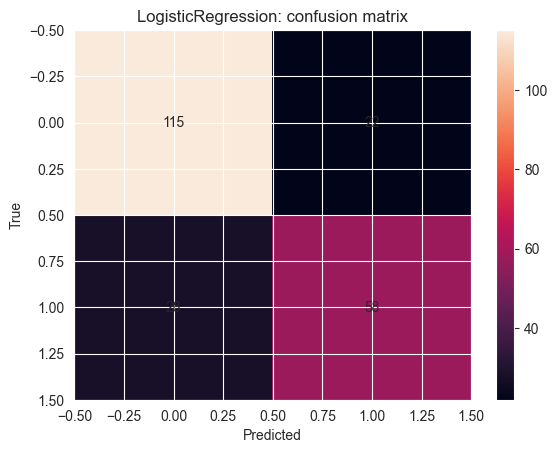

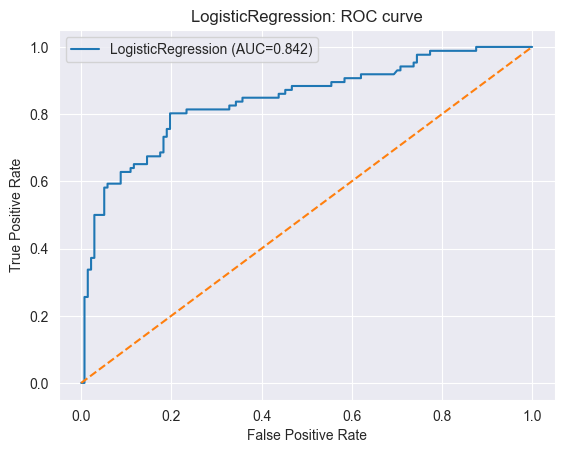

In [50]:
_ = evaluate_model("LogisticRegression", LogisticRegression(max_iter=1000))


SVM (RBF): accuracy=0.7937, precision=0.7703, recall=0.6628, f1=0.7125, ROC-AUC=0.8397

Классификационный отчёт:
               precision    recall  f1-score   support

           0     0.8054    0.8759    0.8392       137
           1     0.7703    0.6628    0.7125        86

    accuracy                         0.7937       223
   macro avg     0.7878    0.7694    0.7758       223
weighted avg     0.7918    0.7937    0.7903       223



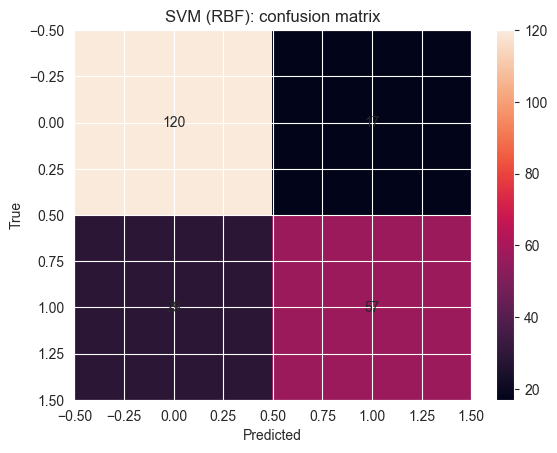

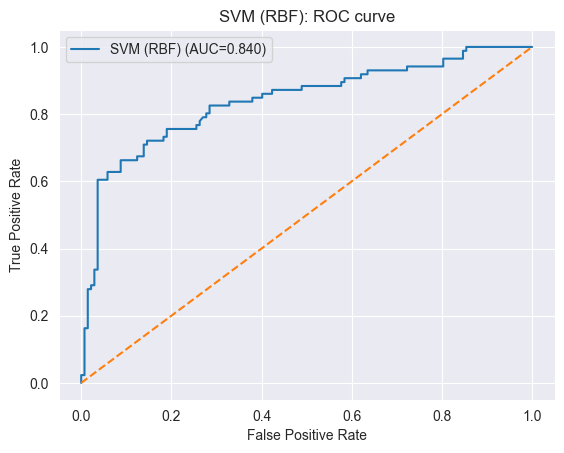

In [91]:
_ = evaluate_model("SVM (RBF)", SVC(kernel='rbf', probability=True, random_state=42))


LDA: accuracy=0.7937, precision=0.7439, recall=0.7093, f1=0.7262, ROC-AUC=0.8378

Классификационный отчёт:
               precision    recall  f1-score   support

           0     0.8227    0.8467    0.8345       137
           1     0.7439    0.7093    0.7262        86

    accuracy                         0.7937       223
   macro avg     0.7833    0.7780    0.7804       223
weighted avg     0.7923    0.7937    0.7928       223



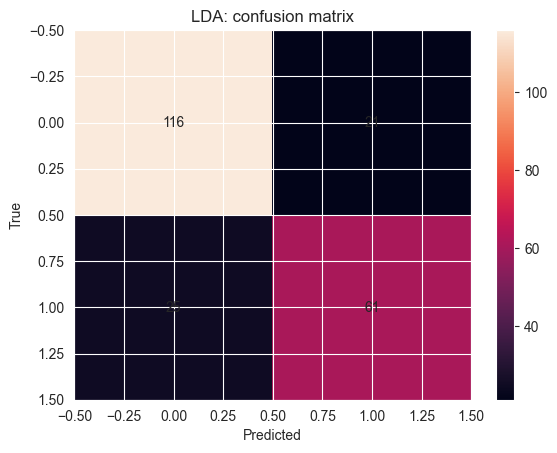

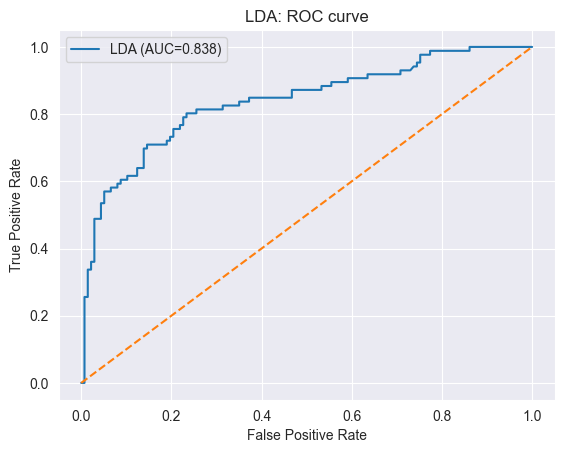

In [92]:
_ = evaluate_model("LDA", LDA())

QDA: accuracy=0.7803, precision=0.7606, recall=0.6279, f1=0.6879, ROC-AUC=0.8503

Классификационный отчёт:
               precision    recall  f1-score   support

           0     0.7895    0.8759    0.8304       137
           1     0.7606    0.6279    0.6879        86

    accuracy                         0.7803       223
   macro avg     0.7750    0.7519    0.7592       223
weighted avg     0.7783    0.7803    0.7755       223



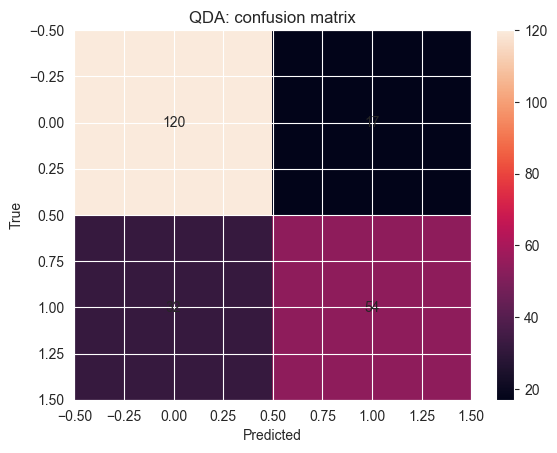

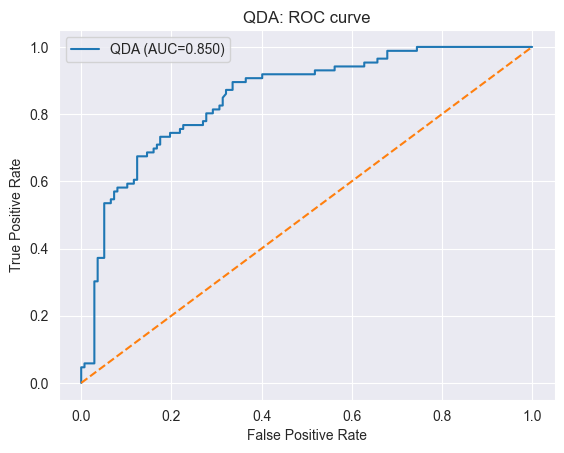

In [93]:
_ = evaluate_model("QDA", QDA(reg_param=0.01))

In [94]:
# Таблица метрик
summary = pd.DataFrame([
    {k: v for k, v in r.items() if k in ("model", "accuracy", "precision", "recall", "f1", "roc_auc")}
    for r in results
]).sort_values("roc_auc", ascending=False)
print("Сводная таблица по метрикам (тест):")
summary

Сводная таблица по метрикам (тест):


,model,accuracy,precision,recall,f1,roc_auc
2,QDA,0.780269,0.760563,0.627907,0.687898,0.850323
0,SVM (RBF),0.793722,0.770270,0.662791,0.712500,0.839713
1,LDA,0.793722,0.743902,0.709302,0.726190,0.837846


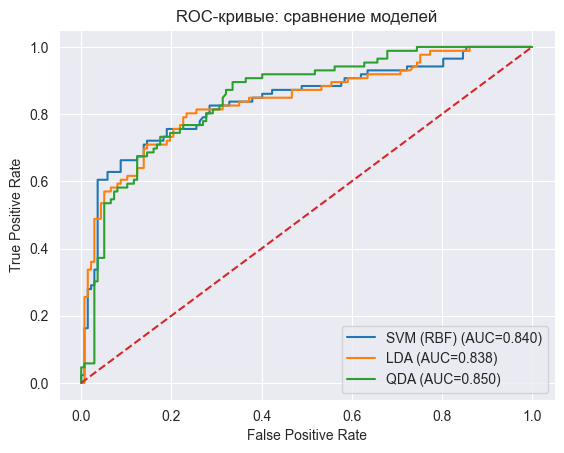

In [95]:
# Сводный график ROC-кривых
plt.figure()
for r in results:
    plt.plot(r["fpr"], r["tpr"], label=f"{r['model']} (AUC={r['roc_auc']:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC-кривые: сравнение моделей")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [96]:
# Выбор лучшего по ROC-AUC (при равенстве можно дополнительно смотреть F1/accuracy)
best = summary.iloc[0]
print(f"Лучший по ROC-AUC: {best['model']} (ROC-AUC={best['roc_auc']:.4f}, F1={best['f1']:.4f}, Accuracy={best['accuracy']:.4f})")


Лучший по ROC-AUC: QDA (ROC-AUC=0.8503, F1=0.6879, Accuracy=0.7803)


**Вопрос:** Какой классификатор оказался лучшим? Почему?

Все классификаторы показали себя достаточно хорошо, в пределах погрешности. Причина – хорошие, много раз всеми исследованные данные 

## Задача 4

Для задачи классификации мы старались построить такую разделяющую прямую, которая бы максимизировала зазор и минимизировала количество точек внутри него, для этого точки попадающие внутрь штрафуются. Давайте теперь зафиксируем ширину зазора, и будем штрафовать точки, которые не попали в него, т.е. теперь мы строим прямую таким образом, чтобы максимизировать число точек лежащих рядом с ней. Такая модицикация Метода опорных векторов называется [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) и используется для решения задачи регрессии

Сгенерируйте данные вида $X \sim~R[0;1], Y = aX^3 + cX + d + \varepsilon$ 

          X         Y
0  0.798512  0.078422
1  0.534474  0.702234
2  0.703474  0.445232
3  0.861583 -0.276276
4  0.274873  0.975110


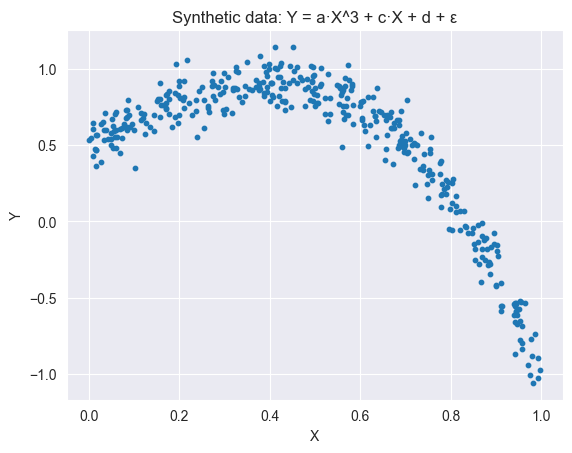

In [97]:
n = 400
a = -3.0
c = 1.5
d = 0.5
sigma = 0.1  # std шума ε

rng = np.random.default_rng()
X = rng.uniform(0.0, 1.0, n)
eps = rng.normal(0.0, sigma, n)
Y = a * X**3 + c * X + d + eps

df = pd.DataFrame({"X": X, "Y": Y})
print(df.head())

# Быстрый скаттер
plt.figure()
plt.scatter(df["X"], df["Y"], s=10)
plt.title("Synthetic data: Y = a·X^3 + c·X + d + ε")
plt.xlabel("X"); plt.ylabel("Y")
plt.show()


Построейте регрессию Методом Опорных Векторов [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html), подберите подходящее ядро (помните, что параметры ядра можно настраивать), визуализируйте результаты

Лучшие параметры: {'svr__C': 10, 'svr__degree': 2, 'svr__epsilon': 0.03, 'svr__gamma': 0.5, 'svr__kernel': 'rbf'}
CV MSE: 0.01108870113374195
Test: MAE=0.0752 RMSE=0.0092 R2=0.9540


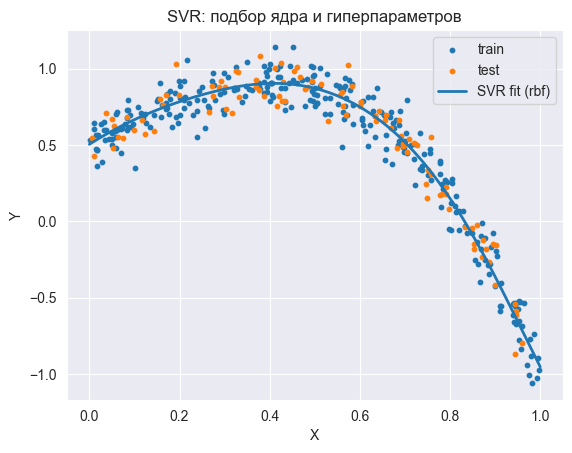

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

# Делаем понятные для sklearn массивы
X2 = np.asarray(X)
if X2.ndim == 1:
    X2 = X2.reshape(-1, 1)

Y2 = np.asarray(Y)


X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size=0.25)

# Pipeline: масштабирование X + SVR
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

# Небольшая сетка для подбора ядра и параметров (можно упороться в linspace, но зачем?)
param_grid = {
    "svr__kernel": ["rbf", "poly", "linear"],
    "svr__C": [0.5, 3, 10],
    "svr__epsilon": [0.03, 0.1],
    "svr__gamma": ["scale", 0.5],   # для rbf/poly; для linear игнорируется
    "svr__degree": [2, 3]           # только для poly; для остальных игнорируется
}

gcv = GridSearchCV(
    pipe, param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5, n_jobs=-1, verbose=0
)
gcv.fit(X_train, y_train)

best = gcv.best_estimator_
print("Лучшие параметры:", gcv.best_params_)
print("CV MSE:", -gcv.best_score_)
base = {
    "kernel": gcv.best_params_["svr__kernel"],
    "C": gcv.best_params_["svr__C"],
    "gamma": gcv.best_params_.get("svr__gamma", "scale"),
    "degree": gcv.best_params_.get("svr__degree", 3),
}
# Оценка на тесте
y_pred = best.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test: MAE={mae:.4f} RMSE={rmse:.4f} R2={r2:.4f}")

# Визуализация: точки + предсказанная кривая
xs = np.linspace(0, 1, 500).reshape(-1, 1)
ys = best.predict(xs)

plt.figure()
plt.scatter(X_train, y_train, s=10, label="train")
plt.scatter(X_test, y_test, s=10, label="test")
plt.plot(xs, ys, linewidth=2, label=f"SVR fit ({gcv.best_params_['svr__kernel']})")
plt.title("SVR: подбор ядра и гиперпараметров")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

Посмотрите как влияет ширина зазора (параметр epsilon) на итоговую модель, визуально сравните полученные кривые

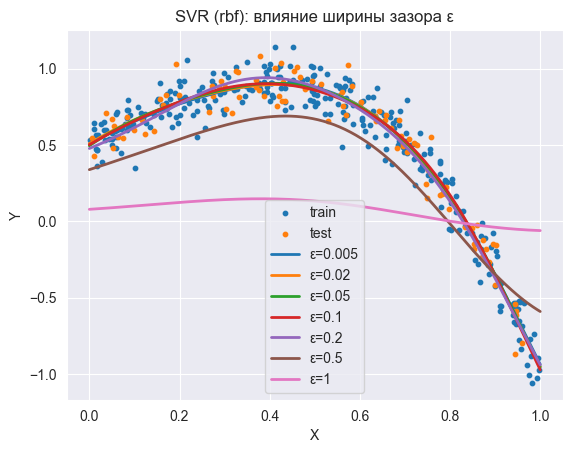

In [106]:
eps_list = [0.005, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

xs = np.linspace(0, 1, 500).reshape(-1, 1)
curves = {}
rows = []

for eps in eps_list:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel=base["kernel"], C=base["C"], gamma=base["gamma"],
                    degree=base["degree"], epsilon=eps))
    ])
    pipe.fit(X_train, y_train)
    yp_test = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, yp_test)
    rmse = mean_squared_error(y_test, yp_test)
    r2 = r2_score(y_test, yp_test)
    rows.append({"epsilon": eps, "MAE": mae, "RMSE": rmse, "R2": r2})

    curves[eps] = pipe.predict(xs)

plt.figure()
plt.scatter(X_train, y_train, s=10, label="train")
plt.scatter(X_test, y_test, s=10, label="test")
for eps in eps_list:
    plt.plot(xs, curves[eps], linewidth=2, label=f"ε={eps}")
plt.title(f"SVR ({base['kernel']}): влияние ширины зазора ε")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

Очевидно получаем, что чем меньше зазор, тем точнее

Сравните построенную вами модель регрессии на основе Метода опорных векторов с Линейной регрессией

           model      MAE     RMSE       R2
             SVR 0.075156 0.009164 0.954001
LinearRegression 0.285635 0.109491 0.450426


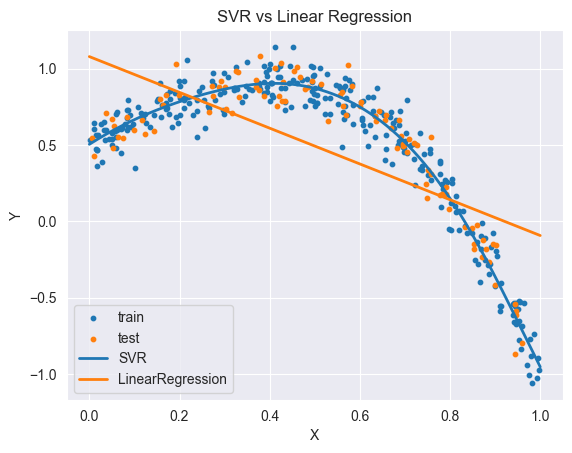

Лучший по RMSE: SVR (RMSE=0.0092, R2=0.9540)


In [108]:
from sklearn.linear_model import LinearRegression


svr_model = best

lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
lr_pipe.fit(X_train, y_train)

def reg_metrics(name, model):
    y_pred = model.predict(X_test)
    return {
        "model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

rows = [
    reg_metrics("SVR", svr_model),
    reg_metrics("LinearRegression", lr_pipe)
]
summary = pd.DataFrame(rows)
print(summary.to_string(index=False))

# Кривые предсказаний
xs = np.linspace(0, 1, 500).reshape(-1, 1)
ys_svr = svr_model.predict(xs)
ys_lr  = lr_pipe.predict(xs)

plt.figure()
plt.scatter(X_train, y_train, s=10, label="train")
plt.scatter(X_test, y_test, s=10, label="test")
plt.plot(xs, ys_svr, linewidth=2, label="SVR")
plt.plot(xs, ys_lr, linewidth=2, label="LinearRegression")
plt.title("SVR vs Linear Regression")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

best_row = summary.sort_values("RMSE").iloc[0]
print(f"Лучший по RMSE: {best_row['model']} (RMSE={best_row['RMSE']:.4f}, R2={best_row['R2']:.4f})")

**Вопрос:** Какая итоговая модель SVR у вас получилась?

Модель получилась достаточно точной, с $ R^2 \approx 0.95$